<a href="https://colab.research.google.com/github/EkeneFidel/Travel-Insurance-Claim-Prediction/blob/main/Datathon_1_Travel_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Libraries

In [ ]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

### Load Data

In [ ]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )

In [ ]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


### EDA & Data Preprocessing

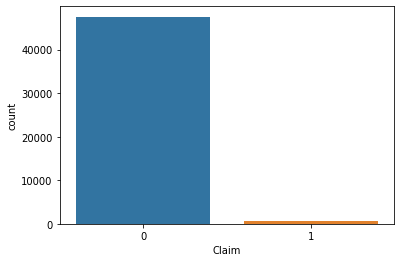

In [ ]:
sns.countplot(insurance_data['Claim'])

In [ ]:
insurance_data.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [ ]:
insurance_data['Gender']=insurance_data['Gender'].fillna(insurance_data['Gender'].mode()[0])

In [ ]:
X = insurance_data.drop("Claim", axis = 1)
y = insurance_data["Claim"]

In [ ]:
X.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,M,29
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,M,36
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,M,25
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,M,23


In [ ]:
X.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [ ]:
X_numerical = X._get_numeric_data()
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              48260 non-null  int64  
 1   Net Sales             48260 non-null  float64
 2   Commision (in value)  48260 non-null  float64
 3   Age                   48260 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 MB


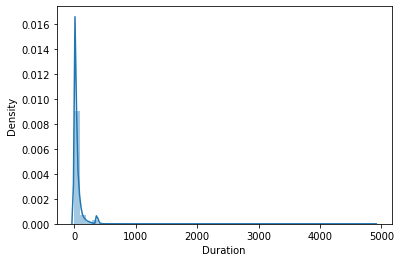

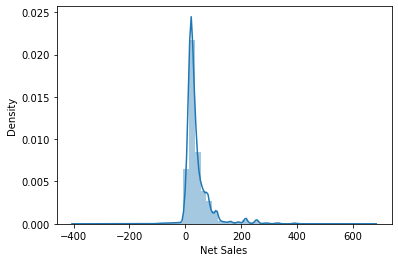

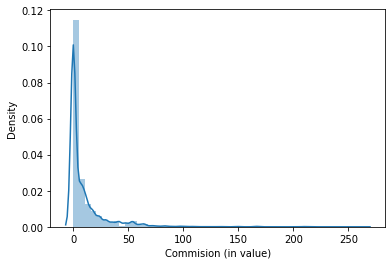

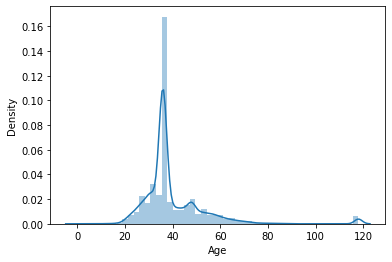

In [ ]:
for i, col in enumerate(X_numerical.columns):
    plt.figure(i)
    sns.distplot(X_numerical[col])

In [ ]:
X['Duration'].describe()

count    48260.000000
mean        49.546602
std        104.828147
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [ ]:
df10=X['Duration']<0
df10.sum()

3

In [ ]:
X.loc[X['Duration'] < 0, 'Duration'] = X['Duration'].mean()

In [ ]:
df6= X['Net Sales']<X['Commision (in value)']
df6.sum()

1539

In [ ]:
X.loc[X['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [ ]:
X_categorical = X.select_dtypes(exclude=[np.number])

In [ ]:
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Agency                48260 non-null  object
 1   Agency Type           48260 non-null  object
 2   Distribution Channel  48260 non-null  object
 3   Product Name          48260 non-null  object
 4   Destination           48260 non-null  object
 5   Gender                48260 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [ ]:
X['Age'].describe()

count    48260.000000
mean        39.927269
std         14.027329
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [ ]:
X.loc[X['Age'] > 100, 'Age'] = X['Age'].mean()

In [ ]:
X['Age'].describe()

count    48260.000000
mean        38.709101
std         10.008714
min          0.000000
25%         35.000000
50%         36.000000
75%         42.000000
max         88.000000
Name: Age, dtype: float64

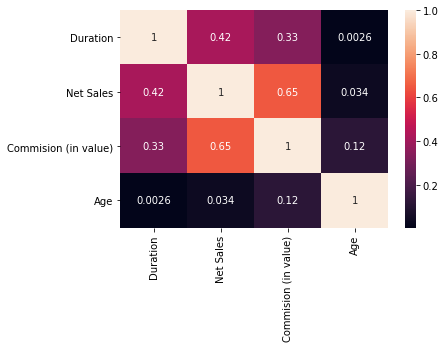

In [ ]:
corr_matrix = X_numerical.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
X['Gender'].replace(to_replace=['F','M'], value=[0,1],inplace=True)

In [ ]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [ ]:
X_extension = pd.get_dummies(X['Distribution Channel'])

In [ ]:
X = pd.concat([X, X_extension], axis=1)

In [ ]:
X.drop('Distribution Channel', inplace=True, axis=1)
X.head()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Offline,Online
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,61.0,UNITED KINGDOM,19.8,11.88,1,29.0,0,1
1,EPX,Travel Agency,Cancellation Plan,93.0,NEW ZEALAND,63.0,0.00,1,36.0,0,1
2,EPX,Travel Agency,2 way Comprehensive Plan,22.0,UNITED STATES,22.0,0.00,1,25.0,0,1
3,C2B,Airlines,Silver Plan,14.0,SINGAPORE,54.5,13.63,1,24.0,0,1
4,EPX,Travel Agency,Cancellation Plan,90.0,VIET NAM,10.0,0.00,1,23.0,0,1


In [ ]:
X_extension = pd.get_dummies(X['Agency Type'])
X = pd.concat([X, X_extension], axis=1)
X.drop('Agency Type', inplace=True, axis=1)
X.head()

,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Offline,Online,Airlines,Travel Agency
0,CWT,Rental Vehicle Excess Insurance,61.0,UNITED KINGDOM,19.8,11.88,1,29.0,0,1,0,1
1,EPX,Cancellation Plan,93.0,NEW ZEALAND,63.0,0.00,1,36.0,0,1,0,1
2,EPX,2 way Comprehensive Plan,22.0,UNITED STATES,22.0,0.00,1,25.0,0,1,0,1
3,C2B,Silver Plan,14.0,SINGAPORE,54.5,13.63,1,24.0,0,1,1,0
4,EPX,Cancellation Plan,90.0,VIET NAM,10.0,0.00,1,23.0,0,1,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Product Name          48260 non-null  object 
 2   Duration              48260 non-null  float64
 3   Destination           48260 non-null  object 
 4   Net Sales             48260 non-null  float64
 5   Commision (in value)  48260 non-null  float64
 6   Gender                48260 non-null  int64  
 7   Age                   48260 non-null  float64
 8   Offline               48260 non-null  uint8  
 9   Online                48260 non-null  uint8  
 10  Airlines              48260 non-null  uint8  
 11  Travel Agency         48260 non-null  uint8  
dtypes: float64(4), int64(1), object(3), uint8(4)
memory usage: 3.1+ MB


In [ ]:
updated_X = X.drop(columns = ["Agency", "Product Name", "Destination"])

In [ ]:
updated_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              48260 non-null  float64
 1   Net Sales             48260 non-null  float64
 2   Commision (in value)  48260 non-null  float64
 3   Gender                48260 non-null  int64  
 4   Age                   48260 non-null  float64
 5   Offline               48260 non-null  uint8  
 6   Online                48260 non-null  uint8  
 7   Airlines              48260 non-null  uint8  
 8   Travel Agency         48260 non-null  uint8  
dtypes: float64(4), int64(1), uint8(4)
memory usage: 2.0 MB


### Train Test Dataset Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(updated_X, y, test_size=0.20, random_state=42)

### Experiment 1: Logistic Regresion, Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lrt = LogisticRegression(random_state=42).fit(X_train, y_train)
y_lr_pred = lrt.predict(X_test)


dtree = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train, y_train)
y_dtr_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("*"*20, "Logistic Regression", "*"*20)
print(classification_report(y_test, y_lr_pred, target_names = ["Claimed", "Non-claimed"]))

******************** Logistic Regression ********************
              precision    recall  f1-score   support

     Claimed       0.98      1.00      0.99      9494
 Non-claimed       0.00      0.00      0.00       158

    accuracy                           0.98      9652
   macro avg       0.49      0.50      0.50      9652
weighted avg       0.97      0.98      0.98      9652



### Fine tune the model:Smote sampling with Random forest and decision tree classifiers

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=7)
X_ov, y_ov = smote.fit_resample(updated_X, y)
X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, train_size=0.7, random_state=7)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
algo_dict = {'Random Forest Classifier':RandomForestClassifier(),'DecisionTreeClassifier':DecisionTreeClassifier(),'Linear SVC':LinearSVC()}


                
algo_name=[]
for i in algo_dict:
    algo_name.append(i)

for i in algo_dict.keys():
      
          
        algo = algo_dict[i]
        model = algo.fit(X_train, y_train)
        y_pred = model.predict(X_test)        
        print('Classification report'+'\n',classification_report(y_test, y_pred))
        print('***'*30)

Classification report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     14333
           1       0.98      0.97      0.98     14199

    accuracy                           0.98     28532
   macro avg       0.98      0.98      0.98     28532
weighted avg       0.98      0.98      0.98     28532

******************************************************************************************
Classification report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     14333
           1       0.97      0.97      0.97     14199

    accuracy                           0.97     28532
   macro avg       0.97      0.97      0.97     28532
weighted avg       0.97      0.97      0.97     28532

******************************************************************************************
Classification report
               precision    recall  f1-score   support

           0       0.63      0.87      0

### Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.762
Accuracy score (validation): 0.761

Learning rate:  0.1
Accuracy score (training): 0.763
Accuracy score (validation): 0.762

Learning rate:  0.25
Accuracy score (training): 0.776
Accuracy score (validation): 0.775

Learning rate:  0.5
Accuracy score (training): 0.799
Accuracy score (validation): 0.797

Learning rate:  0.75
Accuracy score (training): 0.802
Accuracy score (validation): 0.800

Learning rate:  1
Accuracy score (training): 0.816
Accuracy score (validation): 0.816



In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print()
print("Classification Report")
print(classification_report(y_test, predictions))


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     14333
           1       0.83      0.74      0.78     14199

    accuracy                           0.80     28532
   macro avg       0.80      0.80      0.80     28532
weighted avg       0.80      0.80      0.80     28532



[[0.85111282 0.14888718]
 [0.25727164 0.74272836]]


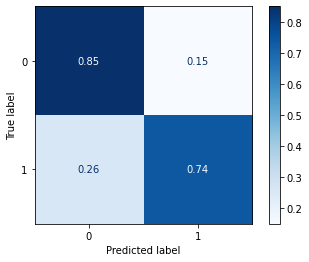

In [ ]:
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))
#print()

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(gb, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
print(disp.confusion_matrix)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

gb2 = GradientBoostingClassifier(random_state = 42)
rnd_search = RandomizedSearchCV(gb2, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='f1', random_state=42)
rnd_search.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.10293837, 0.21944341, 0.0480685 , 0.33026   , 0.11099542,
       0.01102804, 0.00814137, 0.06484869, 0.10427621])

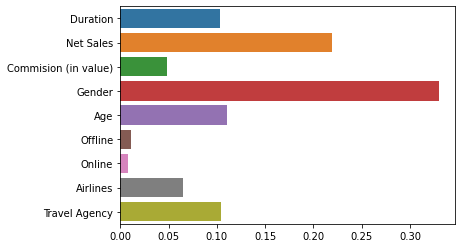

In [ ]:
sns.barplot(x=feature_importances, y=updated_X.columns)

### ANN

In [ ]:
#Deep Learning Model (ANN)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import keras.backend as K

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
#Standardization is very useful for deeplearning model to learn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
batch_size = 1024

#calling dataset
def data_to_tensor(X, y, batch_size, shuffle=True):
  ds = tf.data.Dataset.from_tensor_slices((X, y))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(X))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

#datasets per batch
train_ds = data_to_tensor(X_train, y_train, batch_size=batch_size)
val_ds = data_to_tensor(X_val, y_val, batch_size=batch_size)

#model
def Model_ANN():
    model = tf.keras.Sequential([
            layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dense(128, activation='relu'),
            layers.Dropout(.5),
            layers.Dense(64, activation='relu'),
            layers.Dropout(.3),
            layers.Dense(32, activation='relu'),
            layers.Dropout(.3),
            layers.Dense(1, activation='sigmoid')])
    
    optim =tf.keras.optimizers.Adam(learning_rate=1e-3) 

    model.compile(optimizer=optim,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['AUC'])
    
    return model

model_ann = Model_ANN()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [ ]:
EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', 
                                                 factor=0.1, patience=10, 
                                                 verbose=0, mode='auto',
                                                 min_delta=0.0001)

history = model_ann.fit(train_ds, epochs=EPOCHS, 
                  validation_data=val_ds, 
                  callbacks=[early_stopping], verbose=1)

Epoch 1/1000
49/49 [==============================] - 0s 9ms/step - loss: 1.2205 - auc: 0.6000 - val_loss: 0.6193 - val_auc: 0.7539
Epoch 2/1000
49/49 [==============================] - 0s 5ms/step - loss: 0.6343 - auc: 0.6985 - val_loss: 0.5980 - val_auc: 0.7686
Epoch 3/1000
49/49 [==============================] - 0s 5ms/step - loss: 0.6066 - auc: 0.7350 - val_loss: 0.5768 - val_auc: 0.7842
Epoch 4/1000
49/49 [==============================] - 0s 5ms/step - loss: 0.5881 - auc: 0.7563 - val_loss: 0.5632 - val_auc: 0.7976
Epoch 5/1000
49/49 [==============================] - 0s 6ms/step - loss: 0.5743 - auc: 0.7725 - val_loss: 0.5509 - val_auc: 0.8024
Epoch 6/1000
49/49 [==============================] - 0s 6ms/step - loss: 0.5597 - auc: 0.7858 - val_loss: 0.5458 - val_auc: 0.8133
Epoch 7/1000
49/49 [==============================] - 0s 5ms/step - loss: 0.5508 - auc: 0.7950 - val_loss: 0.5235 - val_auc: 0.8187
Epoch 8/1000
49/49 [==============================] - 0s 5ms/step - loss: 0.

### Save Predictions

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                4546 non-null   object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [ ]:
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Agency Type           15832 non-null  object 
 2   Distribution Channel  15832 non-null  object 
 3   Product Name          15832 non-null  object 
 4   Duration              15832 non-null  int64  
 5   Destination           15832 non-null  object 
 6   Net Sales             15832 non-null  float64
 7   Commision (in value)  15832 non-null  float64
 8   Gender                15832 non-null  object 
 9   Age                   15832 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [ ]:
test_data.loc[test_data['Duration'] < 0, 'Duration'] = test_data['Duration'].mean()

In [ ]:
test_data.loc[test_data['Net Sales'] == 0.0, 'Commision (in value)'] = 0

In [ ]:
test_data.loc[test_data['Age'] > 100, 'Age'] = test_data['Age'].mean()

In [ ]:
test_data['Gender'].replace(to_replace=['F','M'], value=[0,1],inplace=True)

In [ ]:
X_extension = pd.get_dummies(test_data['Distribution Channel'])
test_data = pd.concat([test_data, X_extension], axis=1)
test_data.drop('Distribution Channel', inplace=True, axis=1)

In [ ]:
X_extension = pd.get_dummies(test_data['Agency Type'])
test_data = pd.concat([test_data, X_extension], axis=1)
test_data.drop('Agency Type', inplace=True, axis=1)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                15832 non-null  object 
 1   Product Name          15832 non-null  object 
 2   Duration              15832 non-null  float64
 3   Destination           15832 non-null  object 
 4   Net Sales             15832 non-null  float64
 5   Commision (in value)  15832 non-null  float64
 6   Gender                15832 non-null  int64  
 7   Age                   15832 non-null  float64
 8   Offline               15832 non-null  uint8  
 9   Online                15832 non-null  uint8  
 10  Airlines              15832 non-null  uint8  
 11  Travel Agency         15832 non-null  uint8  
dtypes: float64(4), int64(1), object(3), uint8(4)
memory usage: 1.0+ MB


In [ ]:
updated_test_data = test_data.drop(columns = ["Agency", "Product Name", "Destination"])

In [ ]:
updated_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              15832 non-null  float64
 1   Net Sales             15832 non-null  float64
 2   Commision (in value)  15832 non-null  float64
 3   Gender                15832 non-null  int64  
 4   Age                   15832 non-null  float64
 5   Offline               15832 non-null  uint8  
 6   Online                15832 non-null  uint8  
 7   Airlines              15832 non-null  uint8  
 8   Travel Agency         15832 non-null  uint8  
dtypes: float64(4), int64(1), uint8(4)
memory usage: 680.4 KB


In [ ]:
target = model_ann.predict(updated_test_data) > 0.5

In [ ]:
res = pd.DataFrame(target.round()) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = updated_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)

In [ ]:
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = updated_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>